# Worksheet 18

Name:  
UID: 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

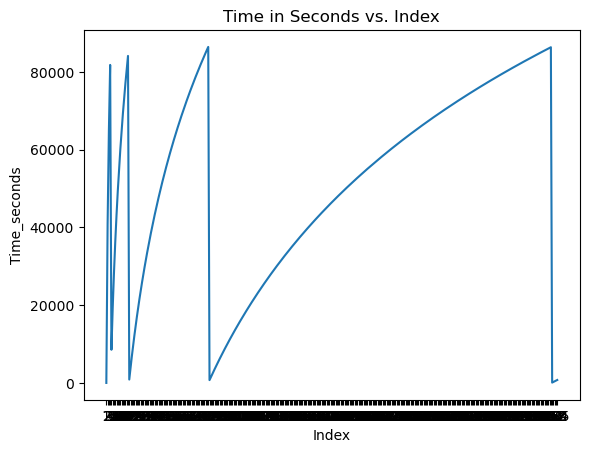

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv', header=None, names=['Index', 'Time'])[1:]

# Convert time to seconds
df['Time_seconds'] = pd.to_timedelta(df['Time']).dt.total_seconds()

# Plot the time in seconds
plt.plot(df['Index'], df['Time_seconds'])
plt.xlabel('Index')
plt.ylabel('Time_seconds')
plt.title('Time in Seconds vs. Index')
plt.show()


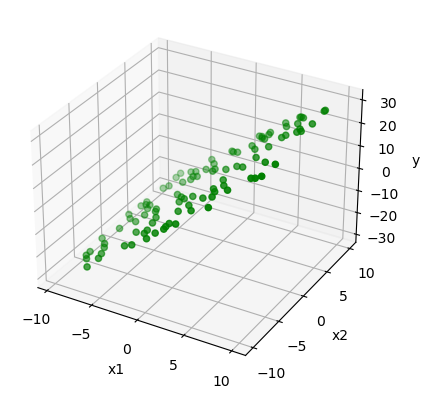

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

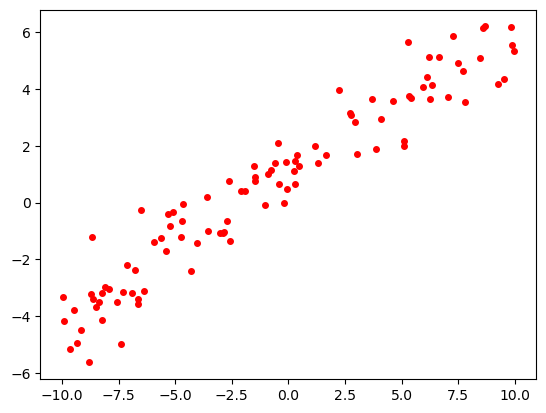

In [94]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE) * 0.9
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

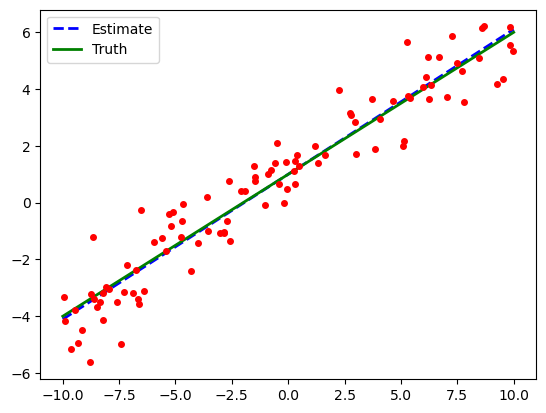

In [95]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X ) @ X.T @ y

x_plot = np.linspace(-10, 10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [96]:
beta_hat

array([0.99997869, 0.51050483])

array([0.99997869, 0.51050483]) vs 1 and .5 pretty good, within [0.00001, 0.01] 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

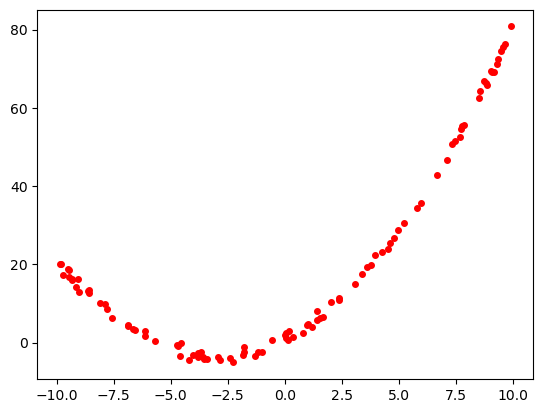

In [97]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * (x**2) + np.random.randn(SAMPLE_SIZE) * 0.9
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

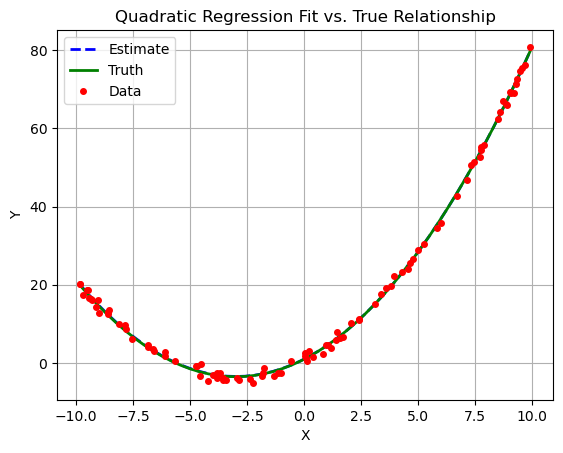

In [98]:

intercept = np.ones((len(x), 1))
X = np.concatenate((intercept, x.reshape(-1, 1), (x**2).reshape(-1, 1)), axis=1)
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Generate points for plotting the estimated curve
x_plot = np.linspace(np.min(x), np.max(x), 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * (x_plot**2)

# Plot the estimated curve, true line, and data points
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * (x_plot**2), lw=2, c='g', label='Truth')
plt.plot(x, y, 'ro', markersize=4, label='Data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression Fit vs. True Relationship')
plt.grid(True)
plt.show()


In [99]:
beta_hat

array([1.02458796, 2.99096217, 0.50066904])

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

array([1.02458796, 2.99096217, 0.50066904]) 1,3,0.5

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

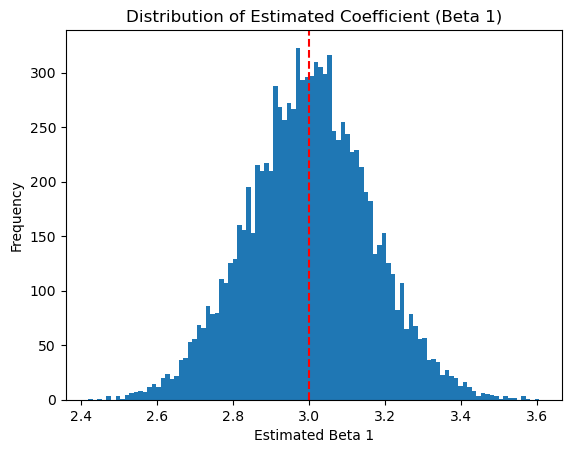

In [4]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * (x**2) + np.random.randn(SAMPLE_SIZE) * 0.9
    intercept = np.ones((len(x), 1))
    X = np.concatenate((intercept, x.reshape(-1, 1)), axis=1)
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)


betas = np.array(betas)
plt.hist(betas[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.xlabel('Estimated Beta 1')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Coefficient (Beta 1)')
plt.show()
